# Generate the metric bar charts

In [1]:
import numpy as np
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn import metrics

%matplotlib inline

In [2]:
# Load the metrics
metrics = dict()
methods = list()
disease_classes = []

current_class = None
with open('classification_metrics.txt') as file:
    for line in file.readlines():
        line = line.strip()
        if line.startswith('Methods:'):
            parts = line.split('\t')
            methods = [method.strip() for method in parts[1:]]
        elif line.startswith('#'):
            current_class = line[1:]
            metrics[current_class] = dict()
        elif current_class is not None:
            parts = line.split('\t')
            metrics[current_class][parts[0]] = [round(float(x)) for x in parts[1:]]

disease_classes = [c for c in metrics.keys()]  

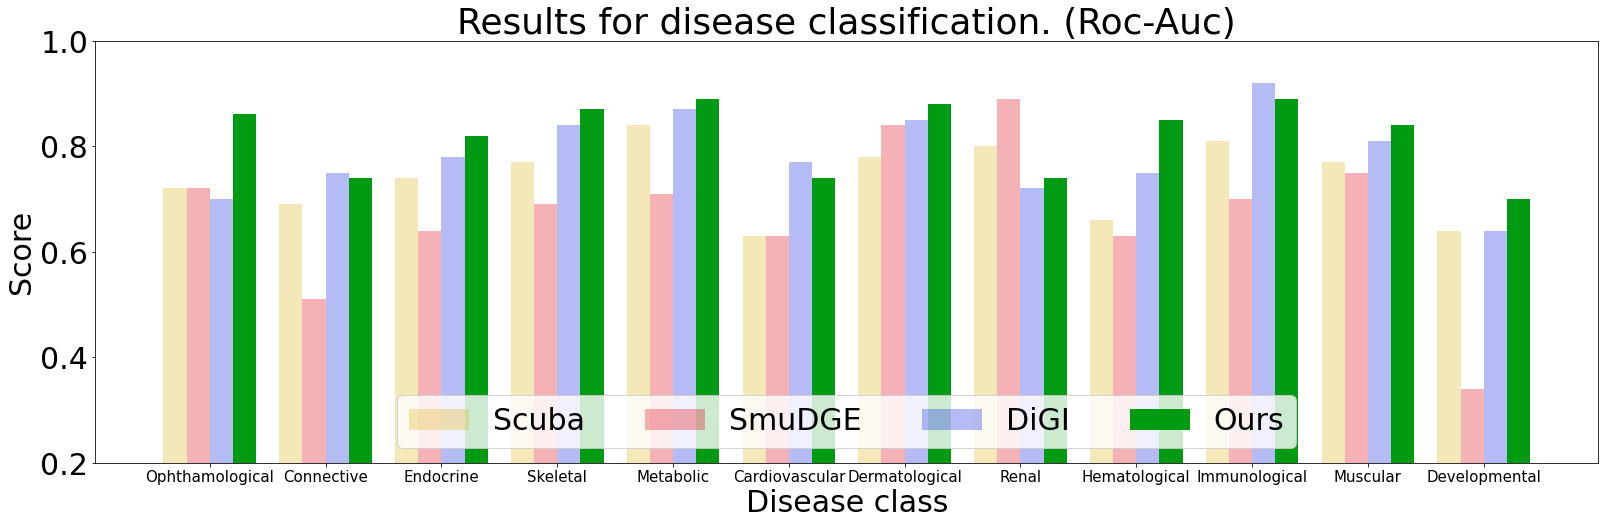

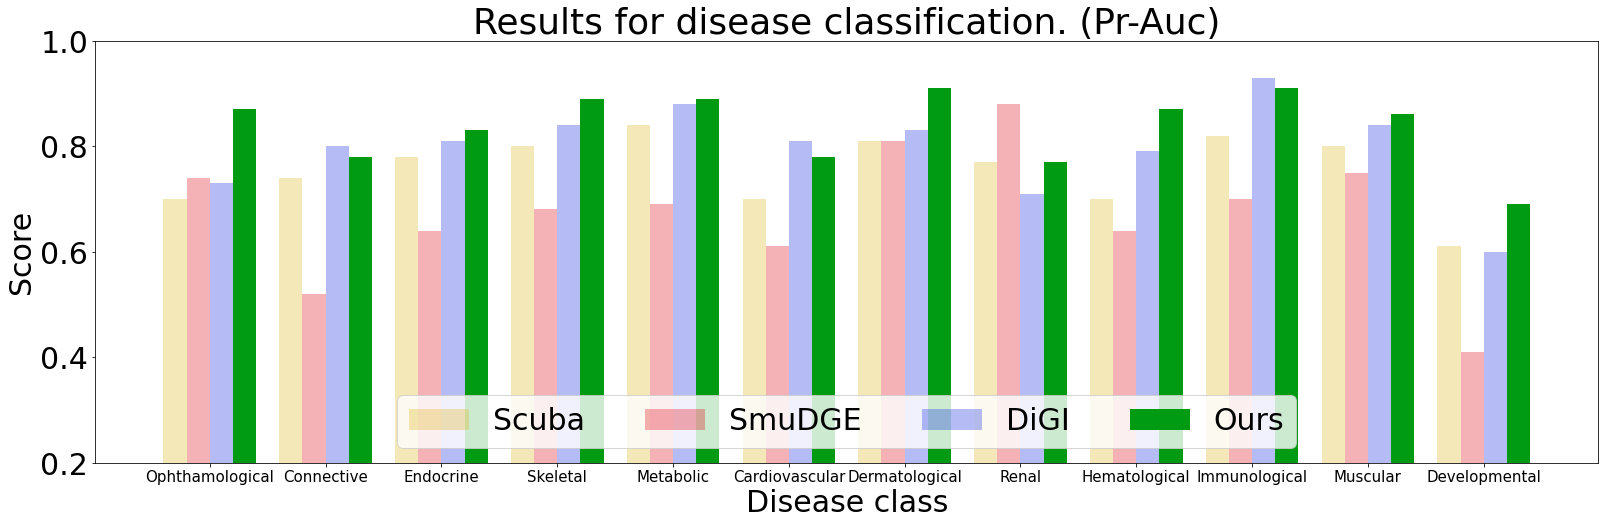

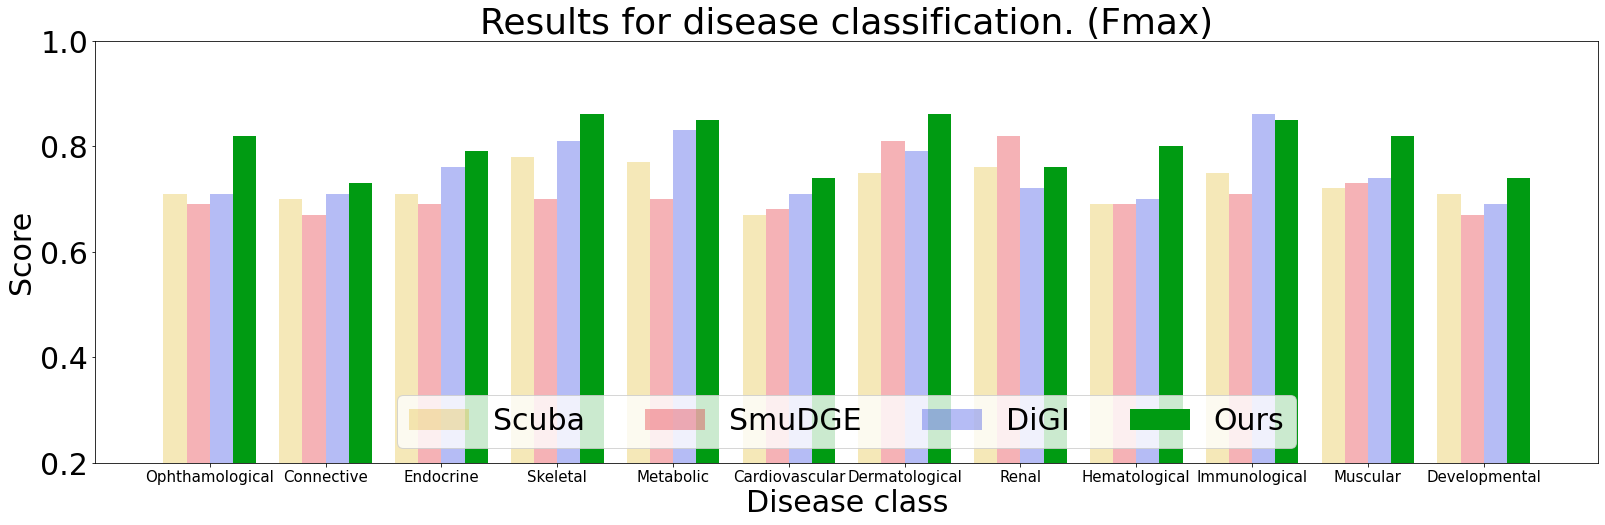

In [3]:
# Plot the results

# Store the metrics into a list for each metric and method.
results = dict()
for method_index, method in enumerate(methods):
    results[method] = {'roc-auc': [], 'pr-auc': [], 'fmax': []}
    for disease_class in disease_classes:
        for metric, values in metrics[disease_class].items():
            results[method][metric].append(values[method_index]/100)

# The colors for the bars.
colors = [
    [0.878, 0.702, 0.086, 0.3],
    [0.878, 0.000, 0.050, 0.3],
    [0.043, 0.141, 0.878, 0.3],
    [0.000, 0.607, 0.070, 1]
]


def plot_bar_chart(plot_only_metrics, width=0.1):
    plt.rcParams.update({'font.size': 30})
    plt.figure(figsize=[23, 8])
    ax = plt.gca()
    ax.set(ylim=[0.2, 1])

    X = np.arange(len(results['Ours']['roc-auc']))

    offset = 0
    for i, (method, metrics) in enumerate(results.items()):
        # opacity = 0.9
        for metric_name, metric_values in metrics.items():
            if metric_name in plot_only_metrics:
                color = colors[i]
                # color[-1] = opacity
                plt.bar(X + offset, metric_values, color=color, width=width)
                # opacity += 0.2
                offset += width

    legends = [f'{method}' for method in results.keys() for metric in results[method].keys() if metric in plot_only_metrics]
    plt.legend(legends, loc='lower center', ncol=4)

    # Overiding the x axis ticks with the disease names
    tick_offset = (4*len(plot_only_metrics) - 1)*width/2
    plt.xticks(
        [i + tick_offset for i in range(len(disease_classes))],
        disease_classes,
        fontsize=15
    )
    plt.title('Results for disease classification. ({})'.format(', '.join(plot_only_metrics).title()))
    plt.xlabel('Disease class')
    plt.ylabel('Score')
    plt.tight_layout()
    plt.savefig('result_bar_chart_{}.pdf'.format('_'.join(plot_only_metrics)))
    plt.show()

plot_bar_chart(plot_only_metrics=['roc-auc'], width=0.20)
plot_bar_chart(plot_only_metrics=['pr-auc'], width=0.20)
plot_bar_chart(plot_only_metrics=['fmax'], width=0.20)

# Format results into a $\LaTeX$ table

In [4]:
# Class & Metric & Scuba & DiGI & SmuDGE & Ours \\
print('Class & Metric & ' + ' & '.join(methods) + ' \\\\')
for disease_class, results in metrics.items():
    print('\\hline')
    print('\multirow{3}{*}{' + disease_class + '}', end=' ')
    for metric, result in results.items():
        values = [round(float(x)) for x in result]
        max_value = max(values)
        max_indexes = [i for i, x in enumerate(values) if x == max_value]
        values = [ '0.' + str(x) for x in values]
        for index in max_indexes:
            values[index] = '\\textbf{' + values[index] + '}'
        values = ' & '.join(values)
        print(f'& {metric} & ' + values + ' \\\\')

Class & Metric & Scuba & SmuDGE & DiGI & Ours \\
\hline
\multirow{3}{*}{Ophthamological} & roc-auc & 0.72 & 0.72 & 0.70 & \textbf{0.86} \\
& pr-auc & 0.70 & 0.74 & 0.73 & \textbf{0.87} \\
& fmax & 0.71 & 0.69 & 0.71 & \textbf{0.82} \\
\hline
\multirow{3}{*}{Connective} & roc-auc & 0.69 & 0.51 & \textbf{0.75} & 0.74 \\
& pr-auc & 0.74 & 0.52 & \textbf{0.80} & 0.78 \\
& fmax & 0.70 & 0.67 & 0.71 & \textbf{0.73} \\
\hline
\multirow{3}{*}{Endocrine} & roc-auc & 0.74 & 0.64 & 0.78 & \textbf{0.82} \\
& pr-auc & 0.78 & 0.64 & 0.81 & \textbf{0.83} \\
& fmax & 0.71 & 0.69 & 0.76 & \textbf{0.79} \\
\hline
\multirow{3}{*}{Skeletal} & roc-auc & 0.77 & 0.69 & 0.84 & \textbf{0.87} \\
& pr-auc & 0.80 & 0.68 & 0.84 & \textbf{0.89} \\
& fmax & 0.78 & 0.70 & 0.81 & \textbf{0.86} \\
\hline
\multirow{3}{*}{Metabolic} & roc-auc & 0.84 & 0.71 & 0.87 & \textbf{0.89} \\
& pr-auc & 0.84 & 0.69 & 0.88 & \textbf{0.89} \\
& fmax & 0.77 & 0.70 & 0.83 & \textbf{0.85} \\
\hline
\multirow{3}{*}{Cardiovascular} & roc-